<img src="911.jpg"></img>

<b>911</b> is an emergency telephone number for the North American Numbering Plan (NANP). Analysing emergency calls dataset and discovering hidden trends and patterns will help in ensuring that the emergency response team is better equipped to deal with emergencies.

Considering road accidents, fire accidents etc, high numbers in specific areas indicate that there is a high demand for ambulance services in those areas. Road accidents in some areas might be due to road conditions which need to be improved. High frequency of emergencies due to respiratory problems might be due to harmful pollutants in the air in that specific area. Association rule mining will thus help in discovering such patterns.

The dataset contains Emergency 911 calls. The attributes chosen include: type of emergency, time stamp, township where the emergency has occurred.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

print("Libraries imported")

Libraries imported


In [2]:
data=pd.read_csv('911.csv')

In [3]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
data.shape

(99492, 9)

Dataset consists of 631339 observations and 9 fields.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
data.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

The data contains the following fields:
1. lat : String variable, Latitude
2. lng: String variable, Longitude
3. desc: String variable, Description of the Emergency Call
4. zip: String variable, Zipcode
5. title: String variable, Title
6. timeStamp: String variable, YYYY-MM-DD HH:MM:SS
7. twp: String variable, Township
8. addr: String variable, Address
9. e: String variable, Dummy variable (always 1)

<b>`e` column is a dummy variable, whose value is always 1. Drop it as it will not providing us any useful information.

In [7]:
data.drop('e',axis=1,inplace=True)

<b>Convert `timeStamp` to datetime type

In [8]:
type('timeStamp')

str

In [9]:
data["timeStamp"]= pd.to_datetime(data["timeStamp"]) 

In [10]:
data.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
dtype: object

<b>In the `title` column there are "Departments:Reasons" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called `Department` the department name and another column `Reason` which consists of reason for calling a department.

In [11]:
data['Department']=data['title'].apply(lambda x:x.split(':')[0])
data['Reason']=data['title'].apply(lambda x:x.split(':')[1])
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Department,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS


<b>Collect specific attributes from a Datetime object such as `date`, `year`, `hour`, `month`, `dayofweek`

In [12]:
data['date'] = pd.DatetimeIndex(data['timeStamp']).date
data['year'] = pd.DatetimeIndex(data['timeStamp']).year
data['hour'] = pd.DatetimeIndex(data['timeStamp']).hour
data['month'] = pd.DatetimeIndex(data['timeStamp']).month
data['dayofweek'] = pd.DatetimeIndex(data['timeStamp']).dayofweek

In [13]:
data['weekday_name'] =data['dayofweek'].map({
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6:"Sunday"
})

In [14]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Department,Reason,date,year,hour,month,dayofweek,weekday_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,2015-12-10,2015,17,12,3,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,2015-12-10,2015,17,12,3,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,2015-12-10,2015,17,12,3,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,2015-12-10,2015,17,12,3,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,2015-12-10,2015,17,12,3,Thursday


<b>Top 5 `zip` codes for 911 calls

In [15]:
data['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

<b>Top 5 `townships` for 911 calls

In [16]:
data['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

<b>Number of unique `title` codes

In [17]:
data['title'].nunique()

110

<b>Most common `Reason` for a 911 call

In [18]:
data['Department'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Department, dtype: int64

<b>Countplot of 911 calls by `Department`

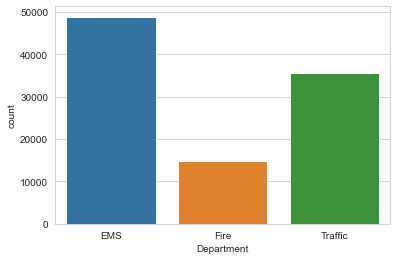

In [19]:
sns.countplot(data['Department'])

From above chart, the main `Department` for 911 calls is majorly EMS and Traffic.

<b>Countplot of 911 calls by `year` and hue as `Department`

Text(0.5, 1.0, 'Emergency call yearly with Department category')

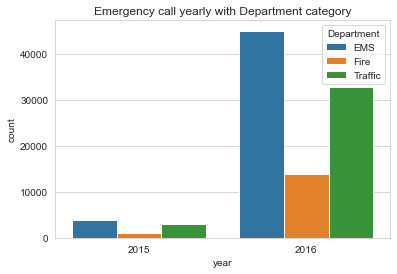

In [20]:
sns.countplot('year',data=data,hue='Department')
plt.title("Emergency call yearly with Department category")

From above chart, there is not much calls in `year` 2015 but there is lot of calls in 2016.

<b>Countplot of the `DayofWeek` with the hue based off of the `Reason`

Text(0.5, 1.0, 'Emergency call on daily basis with Department category')

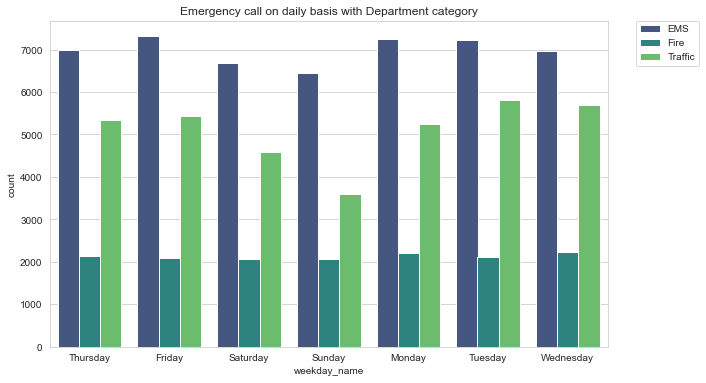

In [21]:
plt.figure(figsize=(10,6))
sns.countplot('weekday_name',data=data,hue='Department',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Emergency call on daily basis with Department category")

From above chart, emergency calls are almost equal on all `days`.

<b>Countplot of the `Month` with the hue based off of the `Department`

Text(0.5, 1.0, 'Emergency call monthly with Department category')

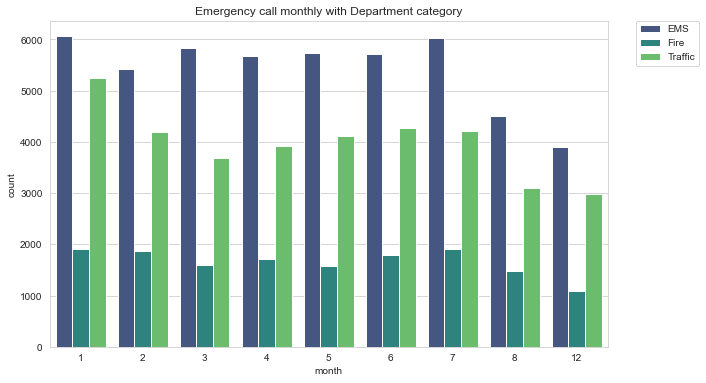

In [22]:
plt.figure(figsize=(10,6))
sns.countplot('month',data=data,hue='Department',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Emergency call monthly with Department category")

From above chart, emergency calls are almost equal on every `month` except 8th and 12th month, there count is comparitvely low.

<b>Countplot `Hour` wise

Text(0.5, 1.0, 'Emergency call hour wise groupby category')

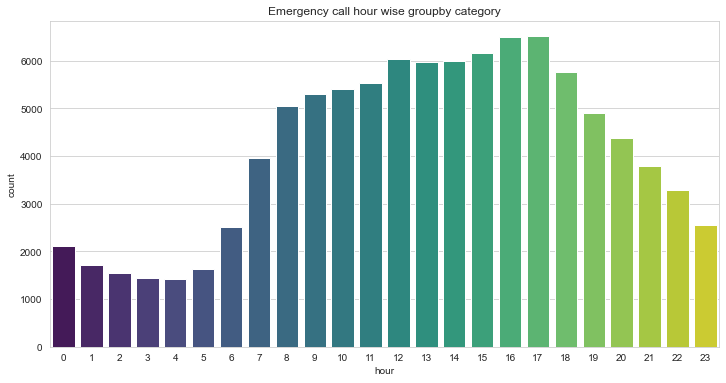

In [23]:
plt.figure(figsize=(12,6))
sns.countplot('hour',data=data,palette='viridis')
plt.title("Emergency call hour wise groupby category")

From above graph, we can observe that maximum number of emergency calls happend at round 5Pm. We need to find out why at this time only and what kind of emergency is required at this time.

<b>Countplot of the `Hour` with the hue based off of the `Reason`

Text(0.5, 1.0, 'Emergency call hourly with Department category')

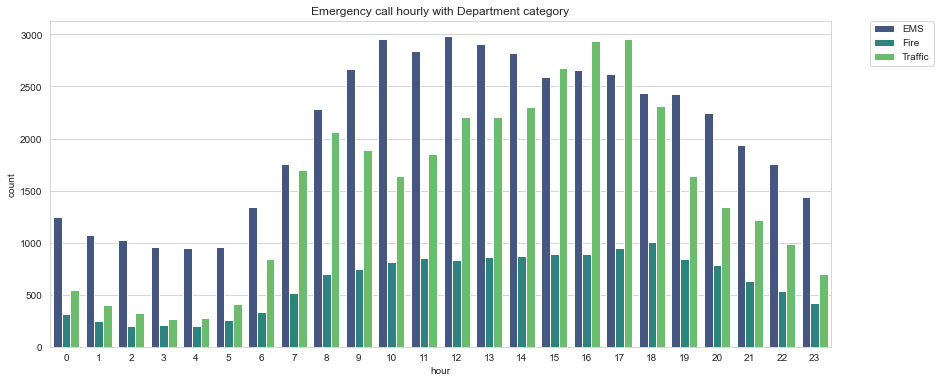

In [24]:
plt.figure(figsize=(14,6))
sns.countplot('hour',data=data,hue='Department',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Emergency call hourly with Department category")

From above graph, it can be concluded that major traffic calls occurs at around 5-6 pm, and other times majorly it's Medical emergency calls

<b>Top 10 `Reason` for emergency calls

In [25]:
data['Reason'].nunique()

81

There are quite many reason for emergency calls, let's pick top 10 reasons and visualize their count.

In [26]:
top_reasons=data['Reason'].value_counts().head(10)

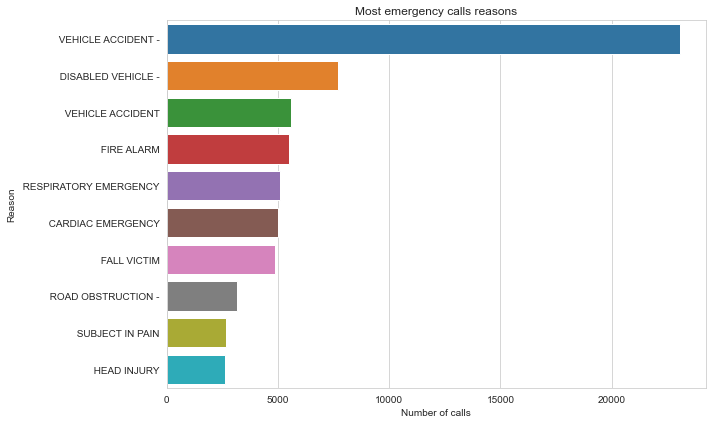

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(top_reasons.values),y=list(top_reasons.index))
plt.title("Most emergency calls reasons")
plt.ylabel("Reason")
plt.xlabel("Number of calls")
plt.tight_layout()

From above graph, Vehicle accident is the `reason` for maximum emergency calls.

In [28]:
byMonth=data.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Department,Reason,date,year,hour,dayofweek,weekday_name
month,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423


<b>Create a simple plot off of the dataframe indicating the count of calls per `month`

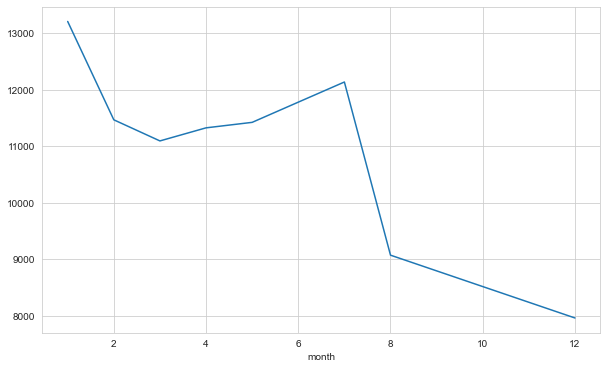

In [29]:
plt.figure(figsize=(10,6))
byMonth['twp'].plot()

In [30]:
byDate=data.groupby('date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Department,Reason,year,hour,month,dayofweek,weekday_name
date,,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447,447


<b>Create a simple plot off of the dataframe indicating the count of calls per `date`

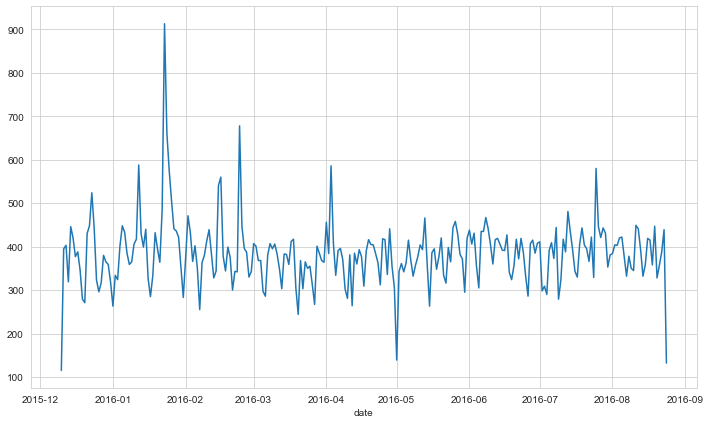

In [31]:
plt.figure(figsize=(10,6))
byDate['twp'].plot()
plt.tight_layout()

<b>Create 3 separate plots with each plot representing a `Department` for the 911 call

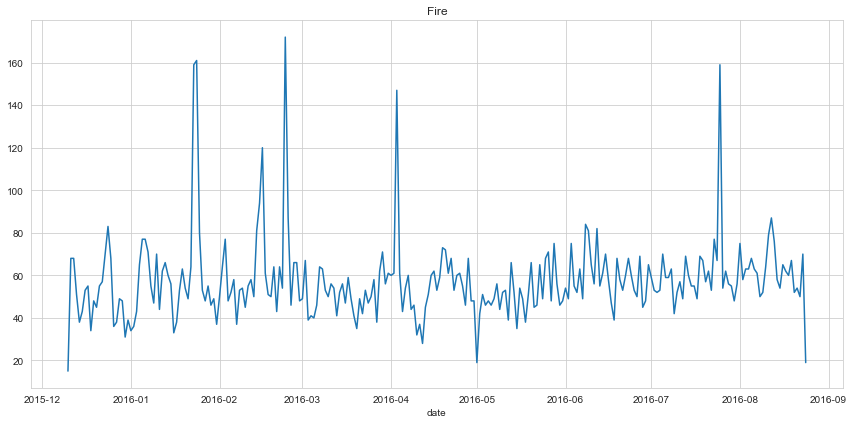

In [32]:
plt.figure(figsize=(12,6))
data[data['Department']=='Fire'].groupby('date').count()['twp'].plot()
plt.title("Fire")
plt.tight_layout()

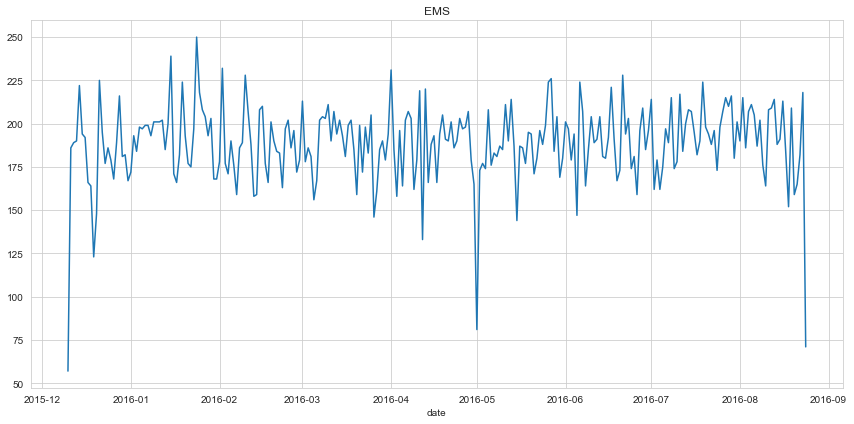

In [33]:
plt.figure(figsize=(12,6))
data[data['Department']=='EMS'].groupby('date').count()['twp'].plot()
plt.title("EMS")
plt.tight_layout()

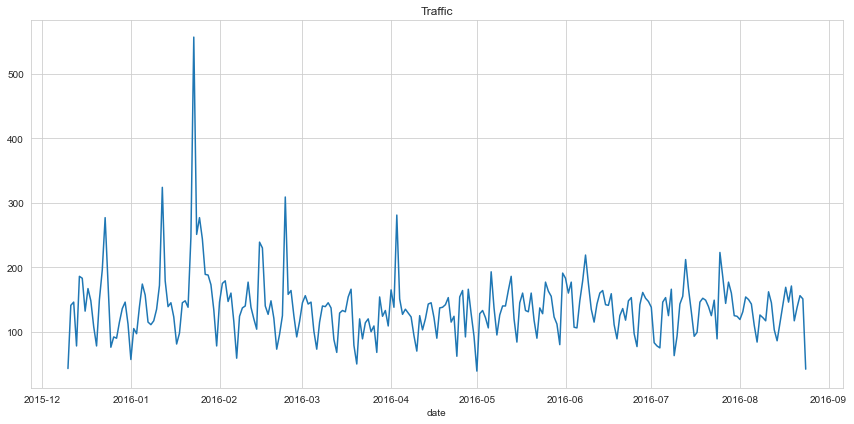

In [34]:
plt.figure(figsize=(12,6))
data[data['Department']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title("Traffic")
plt.tight_layout()

<b>Now let's create `heatmaps` with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. I will combine the `groupby` with an `unstack` method.

In [35]:
dayHour = data.groupby(by=['weekday_name','hour']).count()['Department'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday_name,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<b>Heatmap

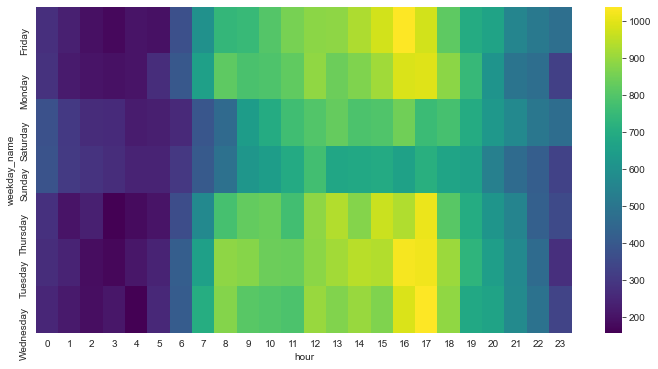

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

From above graph, it is concluded that less emergency service is required at night or early morning, while more at evening time and that is even more on Friday.

<b>Clustermap

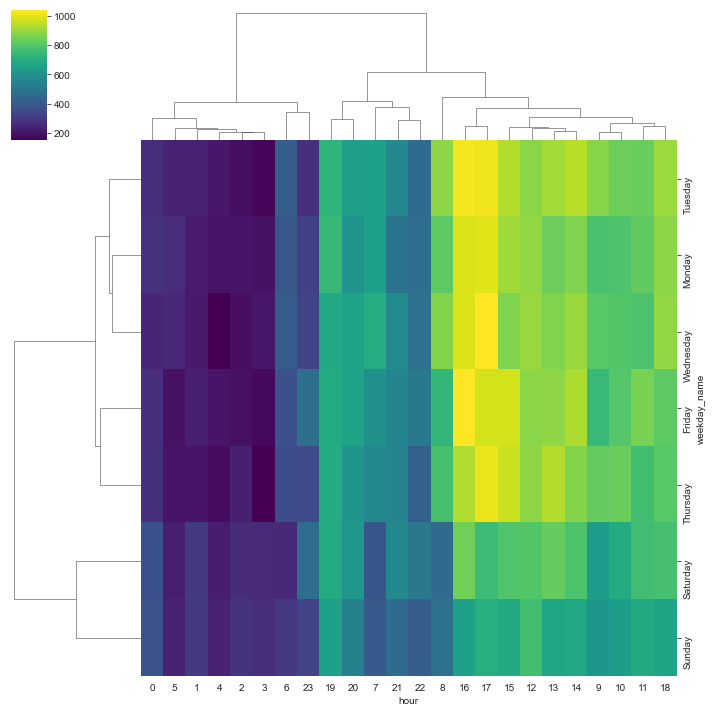

In [37]:
sns.clustermap(dayHour,cmap='viridis')

From above graph, it shows same results with more precision.

<b>Repeat these same plots and operations, for a DataFrame that shows the `Month` as the column

In [38]:
dayMonth = data.groupby(by=['weekday_name','month']).count()['Department'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
weekday_name,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266


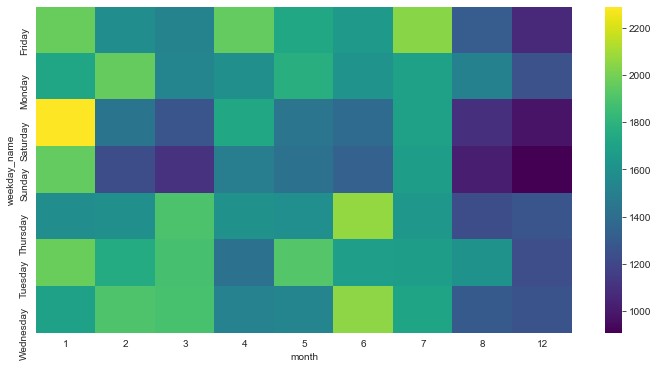

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

From above graph, it is concluded that people called for emergency services more in between Saturday's and Monday's of January `month`.

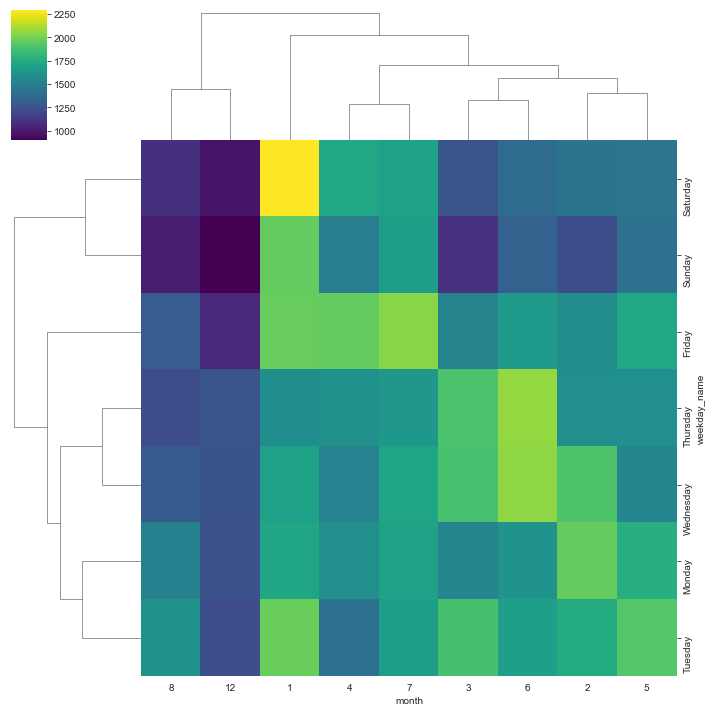

In [40]:
sns.clustermap(dayMonth,cmap='viridis')

From clustermap it gets clear that most calls occured on Saturday's of January `month`